In [1]:
"""
@author: Aayush Agrawal
@Purpose - Re-usable code in Python 3 for general data exploration and pre-processing in modeling process
"""

## Importing required libraries
import pandas as pd ## For DataFrame operation
import numpy as np ## Numerical python for matrix operations
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler ## Preprocessing function
import pandas_profiling ## For easy profiling of pandas DataFrame
import missingno as msno ## Missing value co-occurance analysis

####### Data Exploration ############

def print_dim(df):
    '''
    Function to print the dimensions of a given python dataframe
    Required Input -
        - df = Pandas DataFrame
    Expected Output -
        - Data size
    '''
    print("Data size: Rows-{0} Columns-{1}".format(df.shape[0],df.shape[1]))


def print_dataunique(df):
    '''
    Function to print unique information for each column in a python dataframe
    Required Input - 
        - df = Pandas DataFrame
    Expected Output -
        - Column name
        - Data type of that column
        - Number of unique values in that column
        - 5 unique values from that column
    '''
    counter = 0
    for i in df.columns:
        x = df.loc[:,i].unique()
        print(counter,i,type(df.loc[0,i]), len(x), x[0:5])
        counter +=1
        
def do_data_profiling(df, filename):
    '''
    Function to do basic data profiling
    Required Input - 
        - df = Pandas DataFrame
        - filename = Path for output file with a .html extension
    Expected Output -
        - HTML file with data profiling summary
    '''
    profile = pandas_profiling.ProfileReport(df)
    profile.to_file(outputfile = filename)
    print("Data profiling done")

def missing_value_analysis(df):
    '''
    Function to do basic missing value analysis
    Required Input - 
        - df = Pandas DataFrame
    Expected Output -
        - Chart of Missing value co-occurance
        - Chart of Missing value heatmap
    '''
    msno.matrix(df)
    msno.heatmap(df)

####### Basic helper function ############

def join_df(left, right, left_on, right_on=None, method='left'):
    '''
    Function to outer joins of pandas dataframe
    Required Input - 
        - left = Pandas DataFrame 1
        - right = Pandas DataFrame 2
        - left_on = Fields in DataFrame 1 to merge on
        - right_on = Fields in DataFrame 2 to merge with left_on fields of Dataframe 1
        - method = Type of join
    Expected Output -
        - Pandas dataframe with dropped no variation columns
    '''
    if right_on is None:
        right_on = left_on
    return left.merge(right, 
                      how=method, 
                      left_on=left_on, 
                      right_on=right_on, 
                      suffixes=("","_y"))
    
####### Pre-processing ############    

def drop_allsame(df):
    '''
    Function to remove any columns which have same value all across
    Required Input - 
        - df = Pandas DataFrame
    Expected Output -
        - Pandas dataframe with dropped no variation columns
    '''
    to_drop = list()
    for i in df.columns:
        if len(df.loc[:,i].unique()) == 1:
            to_drop.append(i)
    return df.drop(to_drop,axis =1)

def treat_missing_numeric(df,columns,how = 'mean'):
    '''
    Function to treat missing values in numeric columns
    Required Input - 
        - df = Pandas DataFrame
        - columns = List input of all the columns need to be imputed
        - how = valid values are 'mean', 'mode', 'median','ffill', numeric value
    Expected Output -
        - Pandas dataframe with imputed missing value in mentioned columns
    '''
    if how == 'mean':
        for i in columns:
            print("Filling missing values with mean for columns - {0}".format(i))
            df.ix[:,i] = df.ix[:,i].fillna(df.ix[:,i].mean())
            
    elif how == 'mode':
        for i in columns:
            print("Filling missing values with mode for columns - {0}".format(i))
            df.ix[:,i] = df.ix[:,i].fillna(df.ix[:,i].mode())
    
    elif how == 'median':
        for i in columns:
            print("Filling missing values with median for columns - {0}".format(i))
            df.ix[:,i] = df.ix[:,i].fillna(df.ix[:,i].median())
    
    elif how == 'ffill':
        for i in columns:
            print("Filling missing values with forward fill for columns - {0}".format(i))
            df.ix[:,i] = df.ix[:,i].fillna(method ='ffill')
    
    elif type(how) == int or type(how) == float:
        for i in columns:
            print("Filling missing values with {0} for columns - {1}".format(how,i))
            df.ix[:,i] = df.ix[:,i].fillna(how)
    else:
        print("Missing value fill cannot be completed")
    return df

def treat_missing_categorical(df,columns,how = 'mode'):
    '''
    Function to treat missing values in numeric columns
    Required Input - 
        - df = Pandas DataFrame
        - columns = List input of all the columns need to be imputed
        - how = valid values are 'mode', any string or numeric value
    Expected Output -
        - Pandas dataframe with imputed missing value in mentioned columns
    '''
    if how == 'mode':
        for i in columns:
            print("Filling missing values with mode for columns - {0}".format(i))
            df.ix[:,i] = df.ix[:,i].fillna(df.ix[:,i].mode()[0])
    elif type(how) == str:
        for i in columns:
            print("Filling missing values with {0} for columns - {1}".format(how,i))
            df.ix[:,i] = df.ix[:,i].fillna(how)
    elif type(how) == int or type(how) == float:
        for i in columns:
            print("Filling missing values with {0} for columns - {1}".format(how,i))
            df.ix[:,i] = df.ix[:,i].fillna(str(how))
    else:
        print("Missing value fill cannot be completed")
    return df
    
def min_max_scaler(df,columns):
    '''
    Function to do Min-Max scaling
    Required Input - 
        - df = Pandas DataFrame
        - columns = List input of all the columns which needs to be min-max scaled
    Expected Output -
        - df = Python DataFrame with Min-Max scaled attributes
        - scaler = Function which contains the scaling rules
    '''
    scaler = MinMaxScaler()
    data = pd.DataFrame(scaler.fit_transform(df.loc[:,columns]))
    data.index = df.index
    data.columns = df.columns
    return data, scaler

def z_scaler(df,columns):
    '''
    Function to standardize features by removing the mean and scaling to unit variance
    Required Input - 
        - df = Pandas DataFrame
        - columns = List input of all the columns which needs to be min-max scaled
    Expected Output -
        - df = Python DataFrame with Min-Max scaled attributes
        - scaler = Function which contains the scaling rules
    '''
    scaler = StandardScaler()
    data = pd.DataFrame(scaler.fit_transform(df.loc[:,columns]))
    data.index = df.index
    data.columns = df.columns
    return data, scaler
    
def label_encoder(df,columns):
    '''
    Function to label encode
    Required Input - 
        - df = Pandas DataFrame
        - columns = List input of all the columns which needs to be label encoded
    Expected Output -
        - df = Pandas DataFrame with lable encoded columns
        - le_dict = Dictionary of all the column and their label encoders
    '''
    le_dict = {}
    for c in columns:
        print("Label encoding column - {0}".format(c))
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values.astype('str')))
        df[c] = lbl.transform(list(df[c].values.astype('str')))
        le_dict[c] = lbl
    return df, le_dict

def one_hot_encoder(df, columns):
    '''
    Function to do one-hot encoded
    Required Input - 
        - df = Pandas DataFrame
        - columns = List input of all the columns which needs to be one-hot encoded
    Expected Output -
        - df = Pandas DataFrame with one-hot encoded columns
    '''
    for each in columns:
        print("One-Hot encoding column - {0}".format(each))
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df.drop(columns,axis = 1)

####### Feature Engineering ############
def create_date_features(df,column, date_format = None, more_features = False, time_features = False):
    '''
    Function to extract date features
    Required Input - 
        - df = Pandas DataFrame
        - date_format = Date parsing format
        - columns = Columns name containing date field
        - more_features = To get more feature extracted
        - time_features = To extract hour from datetime field
    Expected Output -
        - df = Pandas DataFrame with additional extracted date features
    '''
    if date_format is None:
        df.loc[:,column] = pd.to_datetime(df.loc[:,column])
    else:
        df.loc[:,column] = pd.to_datetime(df.loc[:,column],format = date_format)
    df.loc[:,column+'_Year'] = df.loc[:,column].dt.year
    df.loc[:,column+'_Month'] = df.loc[:,column].dt.month.astype('uint8')
    df.loc[:,column+'_Week'] = df.loc[:,column].dt.week.astype('uint8')
    df.loc[:,column+'_Day'] = df.loc[:,column].dt.day.astype('uint8')
    
    if more_features:
        df.loc[:,column+'_Quarter'] = df.loc[:,column].dt.quarter.astype('uint8')
        df.loc[:,column+'_DayOfWeek'] = df.loc[:,column].dt.dayofweek.astype('uint8')
        df.loc[:,column+'_DayOfYear'] = df.loc[:,column].dt.dayofyear
        
    if time_features:
        df.loc[:,column+'_Hour'] = df.loc[:,column].dt.hour.astype('uint8')
    return df

def target_encoder(train_df, col_name, target_name, test_df = None, how='mean'):
    '''
    Function to do target encoding
    Required Input - 
        - train_df = Training Pandas Dataframe
        - test_df = Testing Pandas Dataframe
        - col_name = Name of the columns of the source variable
        - target_name = Name of the columns of target variable
        - how = 'mean' default but can also be 'count'
	Expected Output - 
		- train_df = Training dataframe with added encoded features
		- test_df = Testing dataframe with added encoded features
    '''
    aggregate_data = train_df.groupby(col_name)[target_name] \
                    .agg([how]) \
                    .reset_index() \
                    .rename(columns={how: col_name+'_'+target_name+'_'+how})
    if test_df is None:
        return join_df(train_df,aggregate_data,left_on = col_name)
    else:
        return join_df(train_df,aggregate_data,left_on = col_name), join_df(test_df,aggregate_data,left_on = col_name)

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train=pd.read_csv('../data/raw/Train_UWu5bXk.csv')
test=pd.read_csv('../data/raw/Test_u94Q5KV.csv')

In [4]:
print_dataunique(test)

0 Item_Identifier <class 'str'> 1543 ['FDW58' 'FDW14' 'NCN55' 'FDQ58' 'FDY38']
1 Item_Weight <class 'numpy.float64'> 411 [20.75   8.3   14.6    7.315    nan]
2 Item_Fat_Content <class 'str'> 5 ['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
3 Item_Visibility <class 'numpy.float64'> 5277 [0.00756484 0.03842768 0.09957491 0.01538839 0.11859931]
4 Item_Type <class 'str'> 16 ['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods']
5 Item_MRP <class 'numpy.float64'> 4402 [107.8622  87.3198 241.7538 155.034  234.23  ]
6 Outlet_Identifier <class 'str'> 10 ['OUT049' 'OUT017' 'OUT010' 'OUT027' 'OUT046']
7 Outlet_Establishment_Year <class 'numpy.int64'> 9 [1999 2007 1998 1985 1997]
8 Outlet_Size <class 'str'> 4 ['Medium' nan 'Small' 'High']
9 Outlet_Location_Type <class 'str'> 3 ['Tier 1' 'Tier 2' 'Tier 3']
10 Outlet_Type <class 'str'> 4 ['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']


In [5]:
do_data_profiling(test,'test1.html')

Data profiling done


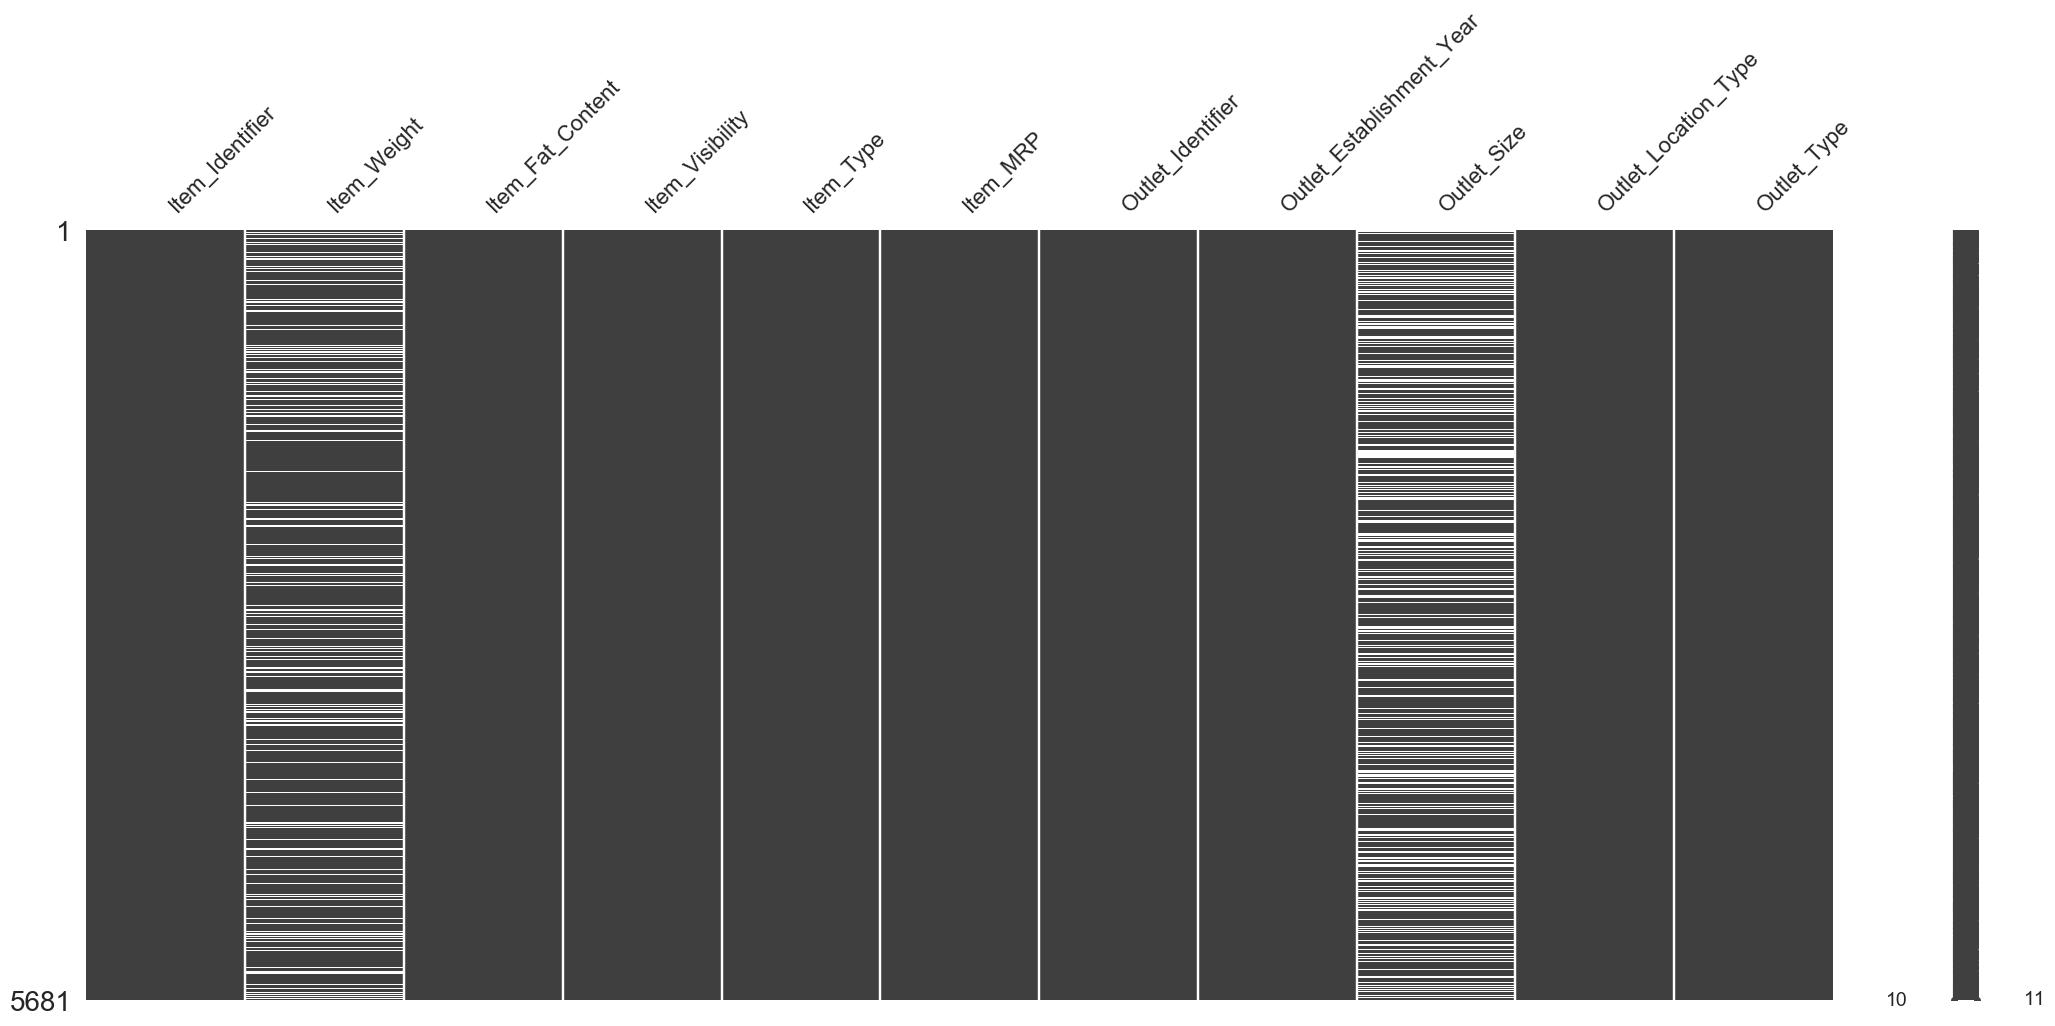

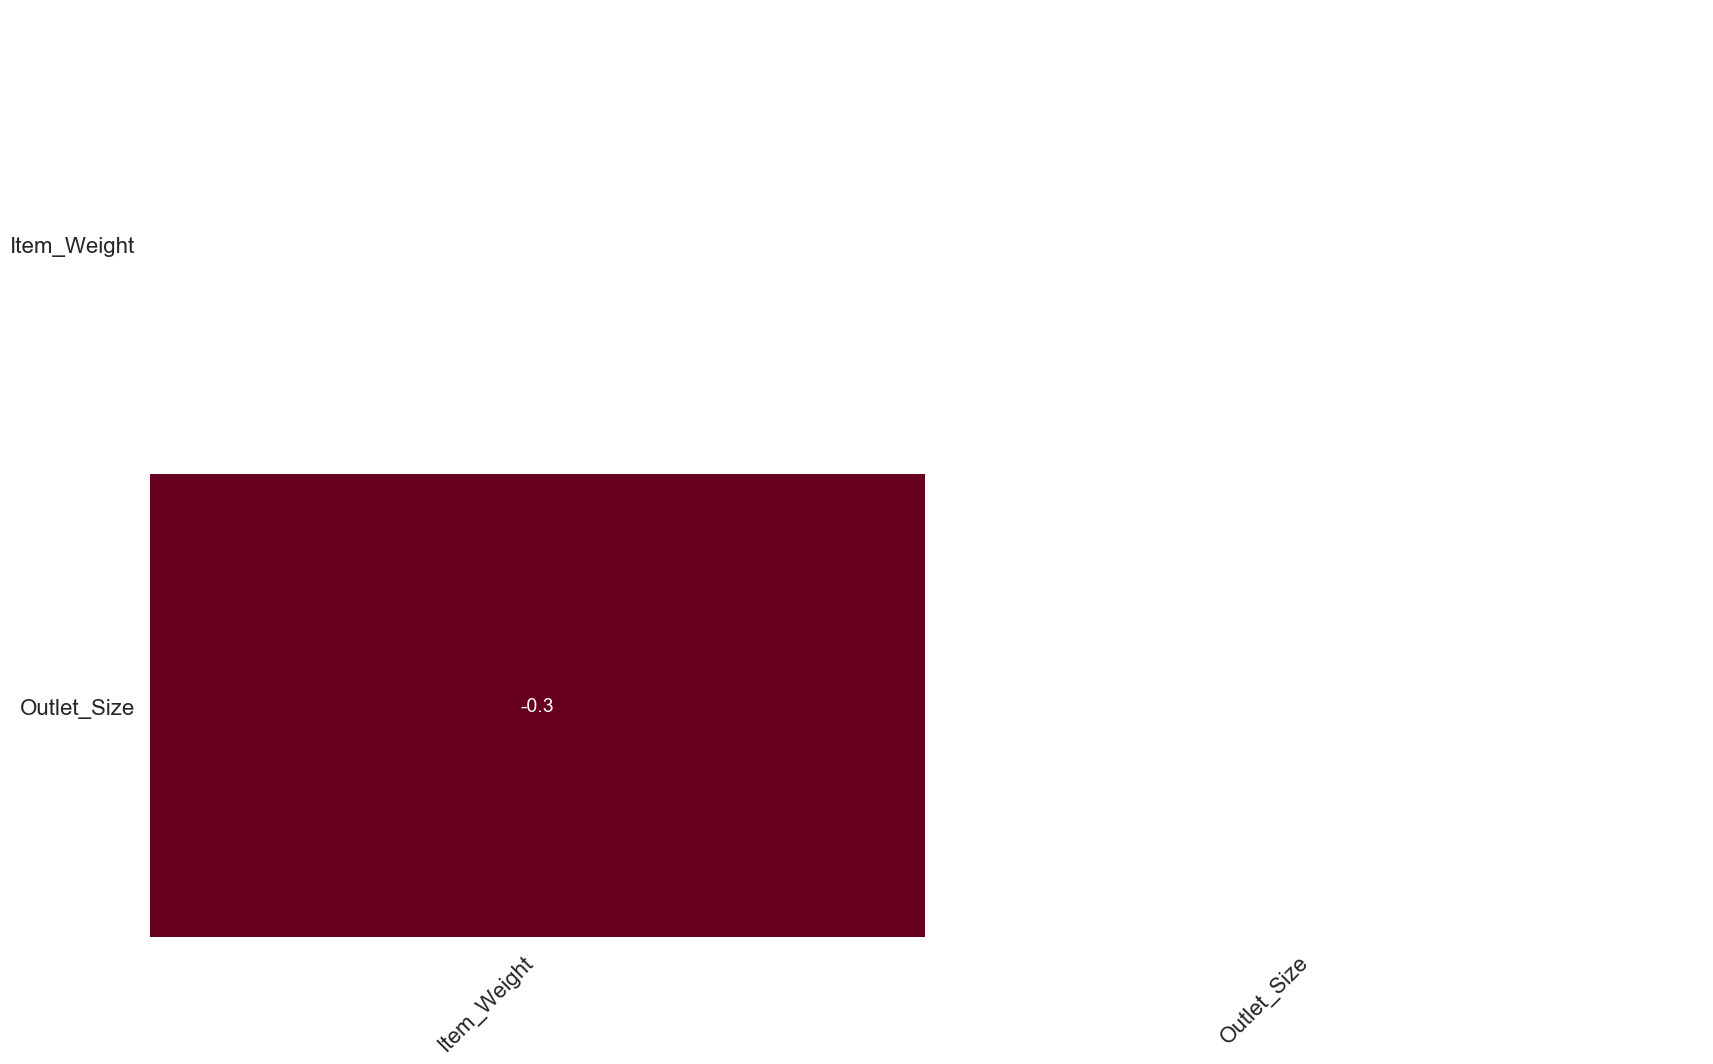

In [6]:
missing_value_analysis(test)

In [7]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True,sort=True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [9]:
data.apply(lambda x:sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [10]:
data.describe(include='all')

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
count,14204,14204,14204.000000,8523.000000,14204,14204.000000,11765.000000,14204.000000,14204,14204,10188,14204,14204
unique,5,1559,NaN,NaN,16,NaN,NaN,NaN,10,3,3,4,2
top,Low Fat,FDM34,NaN,NaN,Fruits and Vegetables,NaN,NaN,NaN,OUT027,Tier 3,Medium,Supermarket Type1,train
freq,8485,10,NaN,NaN,2013,NaN,NaN,NaN,1559,5583,4655,9294,8523
mean,NaN,NaN,141.004977,2181.288914,NaN,0.065953,12.792854,1997.830681,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,62.086938,1706.499616,NaN,0.051459,4.652502,8.371664,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,31.290000,33.290000,NaN,0.000000,4.555000,1985.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,94.012000,834.247400,NaN,0.027036,8.710000,1987.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,142.247000,1794.331000,NaN,0.054021,12.600000,1999.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,185.855600,3101.296400,NaN,0.094037,16.750000,2004.000000,NaN,NaN,NaN,NaN,NaN


In [11]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [12]:
data.apply(lambda x:len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [13]:
data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
source                        object
dtype: object

In [14]:
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

In [15]:
categorical_col = [x for x in  data.dtypes.index if data.dtypes[x]=='object']
categorical_col = [x for x in  categorical_col if x not in ['Item_Identifier','Outlet_Identifier','source']] 

In [16]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [17]:
for col in categorical_col:
    print('Frequency of Category for variable %s'%col)
    print(data[col].value_counts())

Frequency of Category for variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Frequency of Category for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Frequency of Category for variable Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Frequency of Category for variable Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Frequency 

## Data Cleaning

In [18]:
from sklearn.preprocessing import Imputer

In [19]:
#Determine the average weight per item:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

In [20]:
miss_bool_wt =data['Item_Weight'].isnull()

In [21]:
#Impute data and check #missing values before and after imputation to confirm
print ('Orignal #missing: %d'% sum(miss_bool_wt))

Orignal #missing: 2439


In [22]:
data.loc[miss_bool_wt,'Item_Weight'] = data.loc[miss_bool_wt,'Item_Identifier'].apply(lambda x:item_avg_weight.loc[x])

In [23]:
print ('After Imputation  #missing: %d'% sum(data['Item_Weight'].isnull()))

After Imputation  #missing: 0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [25]:
data[data['Outlet_Identifier']=='OUT010'].groupby(['Outlet_Identifier','Outlet_Location_Type']).size().reset_index().groupby('Outlet_Location_Type')[[0]].max()

,0
Outlet_Location_Type,
Tier 3,925


In [26]:
#OUT010-->Grocery Store 	925-->Small
#OUT045-->Supermarket Type1 	1548-->Small
#OUT017-->Supermarket Type1 	1543-->Tier 2-->Small

In [27]:
data[(data['Outlet_Type']=='Supermarket Type1') & (data['Outlet_Location_Type']=='Tier 3')]['Outlet_Size'].unique()

array(['High'], dtype=object)

In [28]:
data[data['Outlet_Size'].isnull()]['Outlet_Identifier'].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [29]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=lambda x: x.mode() )
print('Mode for each Outlet_Type:')
print (outlet_size_mode)

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [30]:
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [31]:
missing_bool_size=data['Outlet_Size'].isnull()

In [32]:
#Impute data and check #missing values before  imputation to confirm
print ('Orignal #missing: %d'% sum(missing_bool_size))

Orignal #missing: 4016


In [33]:
data.loc[missing_bool_size,'Outlet_Size']=data.loc[missing_bool_size,'Outlet_Type'].apply(lambda x:outlet_size_mode[x])

In [34]:
#Impute data and check #missing values after imputation to confirm
print ('Orignal #missing: %d'% sum(data['Outlet_Size'].isnull()))

Orignal #missing: 0


## 4. Feature Engineering

In [35]:
#sales by type and loction type of store
data.pivot_table(values='Item_Outlet_Sales',index=['Outlet_Type','Outlet_Location_Type'])

Item_Outlet_Sales
Outlet_Type       Outlet_Location_Type                   
Grocery Store     Tier 1                       340.329723
                  Tier 3                       339.351662
Supermarket Type1 Tier 1                      2313.099451
                  Tier 2                      2323.990559
                  Tier 3                      2298.995256
Supermarket Type2 Tier 3                      1995.498739
Supermarket Type3 Tier 3                      3694.038558

In [36]:
#sales by type of store
data.pivot_table(values='Item_Outlet_Sales',index=['Outlet_Type'])

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [37]:
#2: Modify Item_Visibility
#We noticed that the minimum value here is 0, which makes no practical sense. Lets consider it like missing information and impute it with mean visibility of that product.
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [38]:
bool_Item_Visibility_zero=data['Item_Visibility']==0

In [39]:
print ('Number of 0 values initially: %d'%sum(bool_Item_Visibility_zero))
data.loc[bool_Item_Visibility_zero,'Item_Visibility'] = data.loc[bool_Item_Visibility_zero,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])
print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


In [40]:
data['Item_Visibility'].describe()

count    14204.000000
mean         0.069710
std          0.049728
min          0.003575
25%          0.031145
50%          0.057194
75%          0.096930
max          0.328391
Name: Item_Visibility, dtype: float64

In [41]:
#3: Create a broad category of Type of Item called item type combined
#categories, these look like being Food, Drinks and Non-Consumables
data['Item_Identifier'].str[0:2].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [42]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [43]:
data['item_type_combined']=data['Item_Identifier'].apply(lambda x:x[0:2])
data['item_type_combined'] = data['item_type_combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})

In [44]:
data['item_type_combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: item_type_combined, dtype: int64

In [45]:
#4: Determine the years of operation of a store
import datetime
current_year=datetime.datetime.now().strftime ("%Y")
data['operational_year']= data['Outlet_Establishment_Year'].apply(lambda x:int(current_year)-int(x))

In [46]:
data['operational_year'].describe()

count    14204.000000
mean        20.169319
std          8.371664
min          9.000000
25%         14.000000
50%         19.000000
75%         31.000000
max         33.000000
Name: operational_year, dtype: float64

In [47]:
#5: Modify categories of Item_Fat_Content
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [48]:
data['Item_Fat_Content']=data['Item_Fat_Content'].map({'LF':'Low Fat',
                                                       'reg':'Regular',
                                                       'low fat':'Low Fat',
                                                       'Low Fat':'Low Fat',
                                                       'Regular':'Regular'
                                                      })

In [49]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [50]:
#data['Item_Fat_Content']=data['item_type_combined'].map({'Non-Consumable':'Non-Edible'}) will not work
data.loc[data['item_type_combined']=='Non-Consumable','Item_Fat_Content']='Non-Edible'

In [51]:
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [52]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,item_type_combined,operational_year
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,19
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks,9
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,19
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,Food,20
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non-Consumable,31


In [53]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','item_type_combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [54]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'item_type_combined','Outlet'])

In [55]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
operational_year               int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
item_type_combined_0           uint8
item_type_combined_1           uint8
item_type_combined_2           uint8
Outlet_0                       uint8
O

## Step 7: Exporting Data

In [56]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [57]:
data.source.value_counts()

train    8523
test     5681
Name: source, dtype: int64

In [58]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [59]:
#Drop unnecessary columns:
test=test.copy()
train=train.copy()
test.drop(['Item_Outlet_Sales'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [60]:
#Export files as modified versions:
train.to_csv('../data/interim/train_modified.csv',index=False)
test.to_csv('../data/interim/test_modified.csv',index=False)

# 4. Model Building

In [61]:
train.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,operational_year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,19,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,9,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,19,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.017834,19.20,OUT010,20,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.009780,8.93,OUT013,31,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [62]:
#Mean based:
mean_sales = train['Item_Outlet_Sales'].mean()

#Define a dataframe with IDs for submission:
base1 = test[['Item_Identifier','Outlet_Identifier']]
base1 = base1.copy()
base1['Item_Outlet_Sales']=mean_sales

#Export submission file
base1.to_csv('../data/processed/alg0_simple_mean.csv',index=False)

In [63]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import model_selection, metrics
from sklearn.metrics import r2_score
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = model_selection.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    print('MAE:', metrics.mean_absolute_error(dtrain[target].values, dtrain_predictions))
    print('MSE:', metrics.mean_squared_error (dtrain[target].values, dtrain_predictions))
    #print('RMSE:', np.sqrt(metrics.neg_mean_squared_error (dtrain[target].values, dtrain_predictions)))
    r2 = r2_score(dtrain[target].values, dtrain_predictions)
    print('R2:',r2)
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

## Linear Regression Model


Model Report
RMSE : 1128
CV Score : Mean - 1129 | Std - 43.2 | Min - 1075 | Max - 1210
MAE: 835.8788070397748
MSE: 1271257.9265990849
R2: 0.5634115494033645


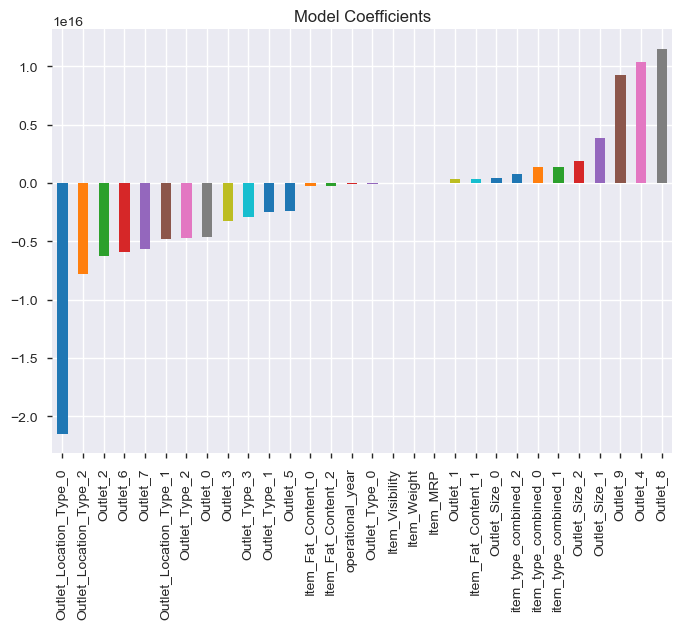

In [64]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, '../data/processed/alg1_linear.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

## Ridge Regression Model


Model Report
RMSE : 1128
CV Score : Mean - 1130 | Std - 44.6 | Min - 1076 | Max - 1217
MAE: 835.9855199125644
MSE: 1273492.1059319053
R2: 0.5626442645960392


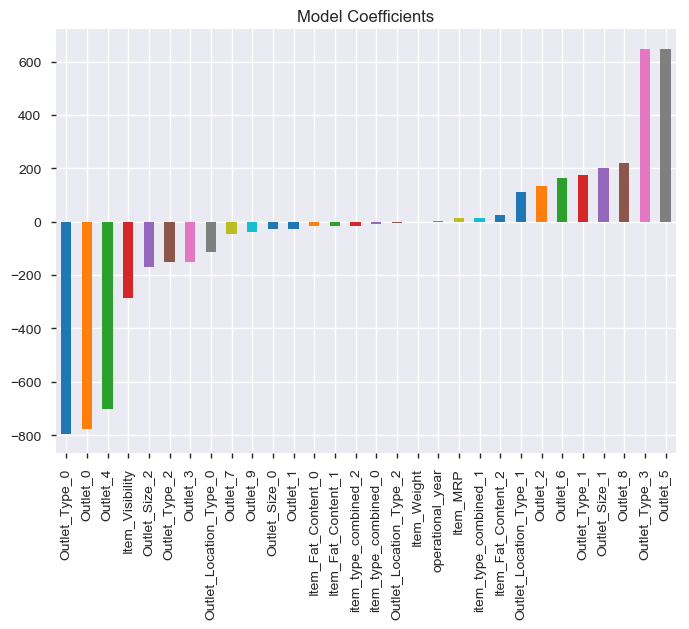

In [65]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, '../data/processed/alg2_Ridge.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

## Decision Tree Model


Model Report
RMSE : 1060
CV Score : Mean - 1091 | Std - 44.23 | Min - 1004 | Max - 1174
MAE: 743.4448086244365
MSE: 1123205.0770630792
R2: 0.6142573792171961


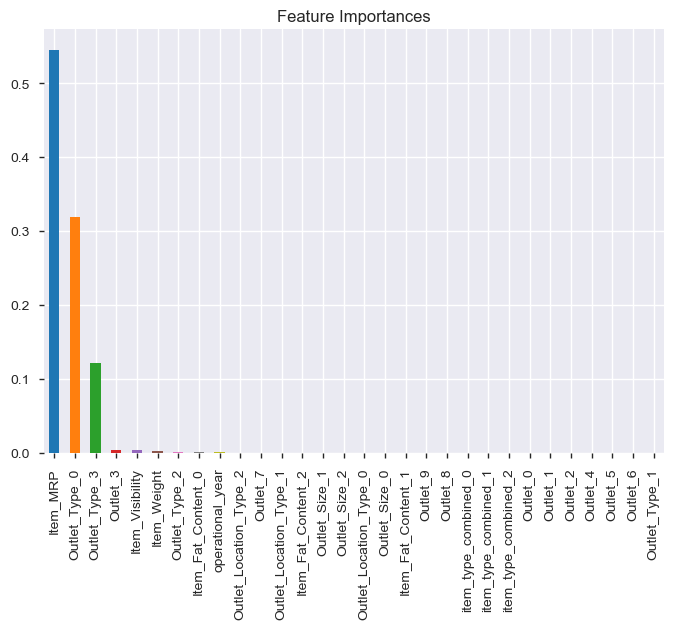

In [66]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, '../data/processed/alg3_decision_tree.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1071
CV Score : Mean - 1096 | Std - 43.3 | Min - 1027 | Max - 1172
MAE: 749.7861777794724
MSE: 1147547.470537374
R2: 0.6058974644993484


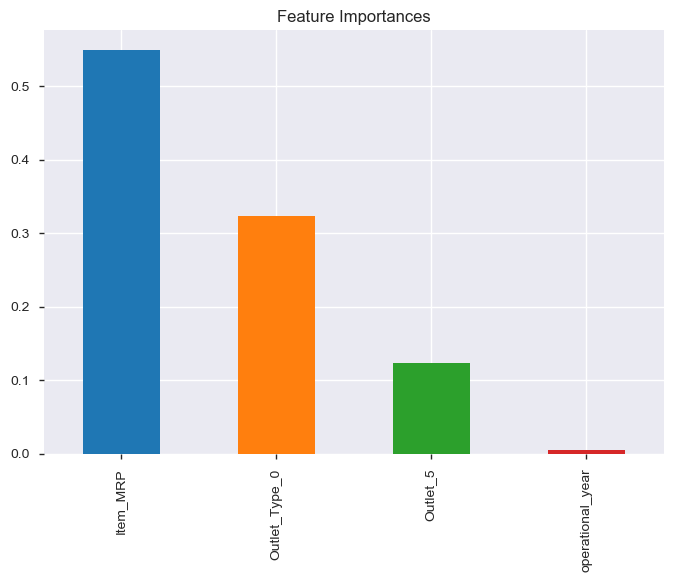

In [67]:
#decision tree with just top 4 variables, a max_depth of 8 and min_samples_leaf as 150.
predictors = ['Item_MRP','Outlet_Type_0','Outlet_5','operational_year']
alg4 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg4, train, test, predictors, target, IDcol, '../data/processed/alg4_decision_tree_max_dept_8_min_leaf_150.csv')
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

## Random Forest Model


Model Report
RMSE : 1073
CV Score : Mean - 1084 | Std - 43.53 | Min - 1021 | Max - 1160
MAE: 752.6750605094084
MSE: 1151513.3871189337
R2: 0.604535448704355


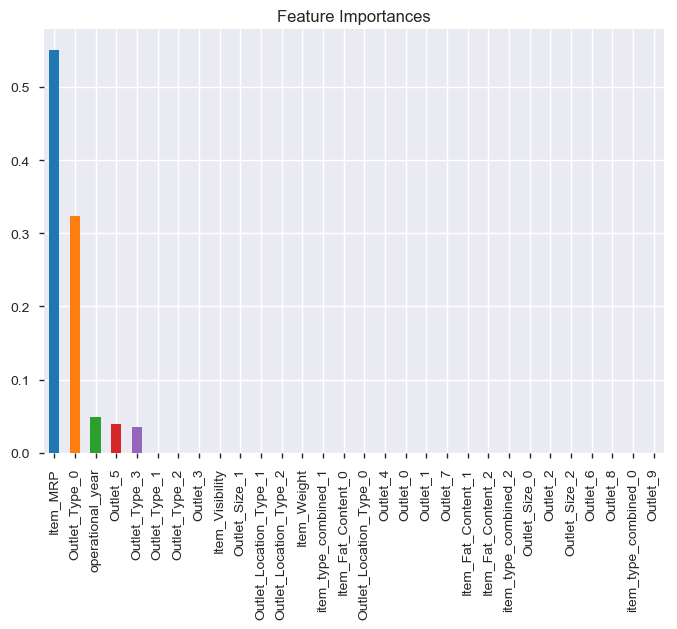

In [68]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, '../data/processed/alg5_random_forest.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1068
CV Score : Mean - 1083 | Std - 43.42 | Min - 1021 | Max - 1159
MAE: 748.4153449958138
MSE: 1141302.3337274182
R2: 0.6080422335085116


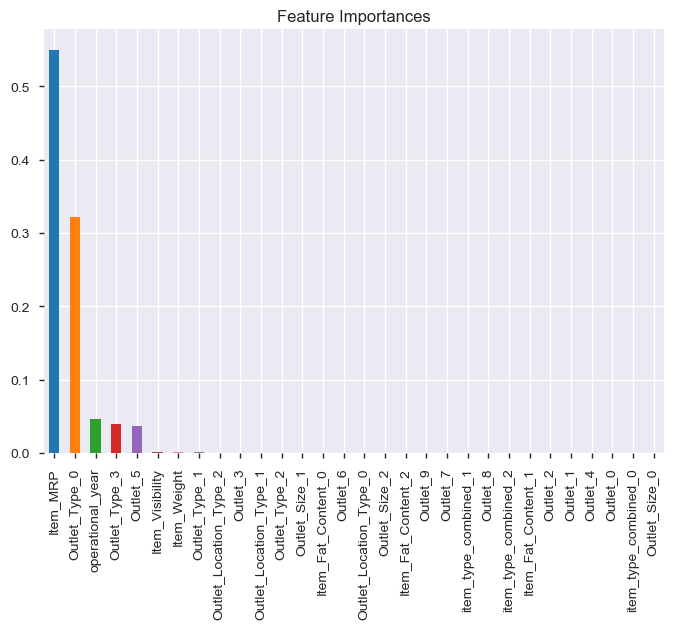

In [69]:
#random forest with max_depth of 6 and 400 trees
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg6 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
modelfit(alg6, train, test, predictors, target, IDcol, '../data/processed/alg6_random_forest_max_depth_600_min_leaf_100.csv')
coef6 = pd.Series(alg6.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Feature Importances')

## LASSO


Model Report
RMSE : 1128
CV Score : Mean - 1129 | Std - 43.81 | Min - 1075 | Max - 1211
MAE: 835.0273279366253
MSE: 1271956.1556036836
R2: 0.5631717564290977


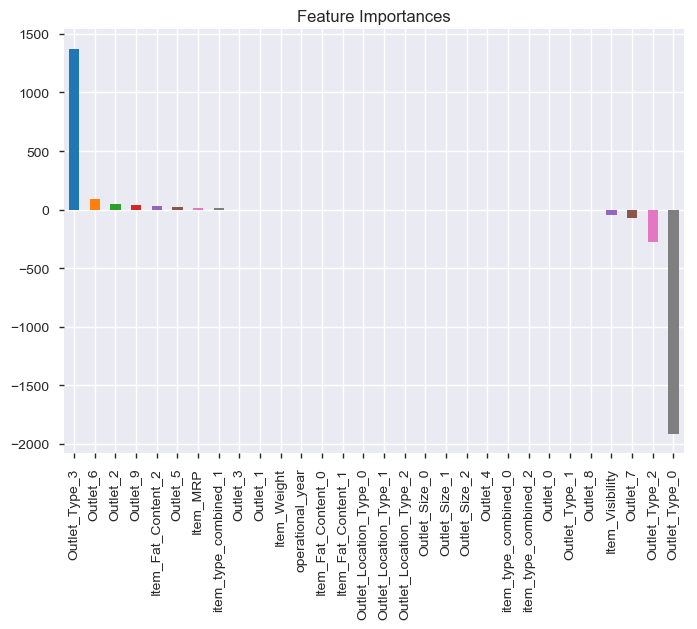

In [73]:
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn import linear_model
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg7 = linear_model.LassoCV(cv=5,normalize=True,random_state=10,alphas=[.1])
#alg7=Lasso(alpha=0.2, normalize=True)
modelfit(alg7, train, test, predictors, target, IDcol, '../data/processed/alg7_lasso.csv')
coef5 = pd.Series(alg7.coef_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

## Adaptive Boost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg8 = AdaBoostRegressor(n_estimators=100,loss="linear",learning_rate=.05)
modelfit(alg8, train, test, predictors, target, IDcol, '../data/processed/alg8_adaptive_boost.csv')
coef5 = pd.Series(alg8.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

## ElasticNet Regression


Model Report
RMSE : 1136
CV Score : Mean - 1137 | Std - 43.14 | Min - 1083 | Max - 1221
MAE: 837.6166718181466
MSE: 1289807.0789142973
R2: 0.5570412090501329


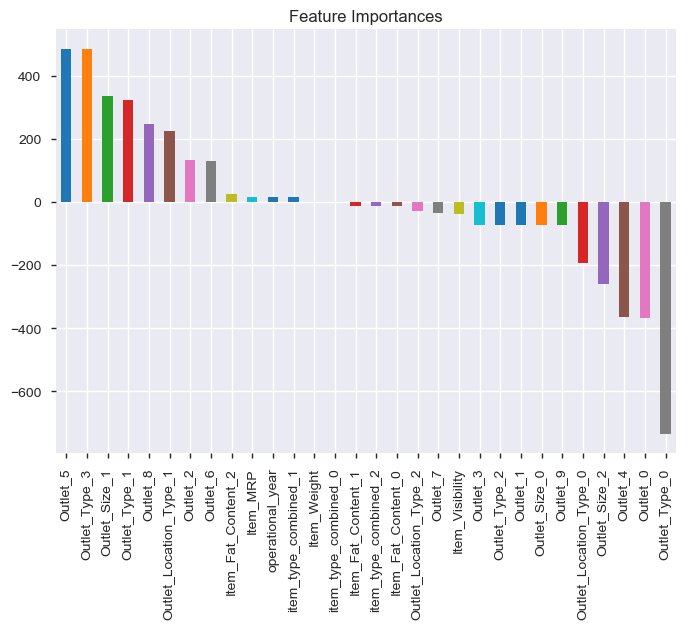

In [75]:
from sklearn.linear_model import ElasticNet
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg9 = ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)
modelfit(alg9, train, test, predictors, target, IDcol, '../data/processed/alg9_elasticNet.csv')
coef5 = pd.Series(alg9.coef_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

## Support Vector Regression (SVR)

In [77]:
from sklearn.svm import SVR
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg10 =SVR(kernel = 'rbf')
modelfit(alg10, train, test, predictors, target, IDcol, '../data/processed/alg10_SVR.csv')
coef5 = pd.Series(alg10.feature_importances_, predictors).sort_values(ascending=False)
#coef5.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1736
CV Score : Mean - 1735 | Std - 92.32 | Min - 1553 | Max - 1906
MAE: 1295.3771609381822
MSE: 3014009.164583279
R2: -0.03510197554462269


AttributeError: 'SVR' object has no attribute 'feature_importances_'

In [102]:
### Running Xgboost
def runLR(train_X, train_y, test_X, test_y=None, test_X2=None):
    model = LinearRegression()
    model.fit(train_X, train_y)
    train_preds = model.predict(train_X)
    test_preds = model.predict(test_X)

    test_preds2 = 0
    if test_X2 is not None:
        test_preds2 = model.predict(test_X2)
    test_loss = 0
    
    train_loss = metrics.mean_squared_error(train_y, train_preds)
    test_loss = metrics.mean_squared_error(test_y, test_preds)
    #print("Train and Test loss : ", train_loss, test_loss)
    return test_preds, test_loss, test_preds2, model

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, '../data/processed/alg1_linear.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

In [103]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
runLR(train[predictors],train[target],test[predictors])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [93]:
test[predictors].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 8523 to 14203
Data columns (total 30 columns):
Item_MRP                  5681 non-null float64
Item_Visibility           5681 non-null float64
Item_Weight               5681 non-null float64
operational_year          5681 non-null int64
Item_Fat_Content_0        5681 non-null uint8
Item_Fat_Content_1        5681 non-null uint8
Item_Fat_Content_2        5681 non-null uint8
Outlet_Location_Type_0    5681 non-null uint8
Outlet_Location_Type_1    5681 non-null uint8
Outlet_Location_Type_2    5681 non-null uint8
Outlet_Size_0             5681 non-null uint8
Outlet_Size_1             5681 non-null uint8
Outlet_Size_2             5681 non-null uint8
Outlet_Type_0             5681 non-null uint8
Outlet_Type_1             5681 non-null uint8
Outlet_Type_2             5681 non-null uint8
Outlet_Type_3             5681 non-null uint8
item_type_combined_0      5681 non-null uint8
item_type_combined_1      5681 non-null uint8
item_type

In [80]:
predictors

['Item_MRP',
 'Item_Visibility',
 'Item_Weight',
 'operational_year',
 'Item_Fat_Content_0',
 'Item_Fat_Content_1',
 'Item_Fat_Content_2',
 'Outlet_Location_Type_0',
 'Outlet_Location_Type_1',
 'Outlet_Location_Type_2',
 'Outlet_Size_0',
 'Outlet_Size_1',
 'Outlet_Size_2',
 'Outlet_Type_0',
 'Outlet_Type_1',
 'Outlet_Type_2',
 'Outlet_Type_3',
 'item_type_combined_0',
 'item_type_combined_1',
 'item_type_combined_2',
 'Outlet_0',
 'Outlet_1',
 'Outlet_2',
 'Outlet_3',
 'Outlet_4',
 'Outlet_5',
 'Outlet_6',
 'Outlet_7',
 'Outlet_8',
 'Outlet_9']